# Lab 9 - Linear Models - Part 1

In [2]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [3]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Synthetic Data

It's very important to understand the underlying data generated by the model you're building and to understand how the algorithm you're using to build the model works. Both of these ends can be accomplished by generating synthetic data and then trying to see if you can recover the "correct" model you used to generate the data.

Generate the following synthetic data sets and model them with the appropriate linear model from the chapter. You can also refer to the chapter to see how to generate the synthetic data (as well as previous labs).

For each of these, save a different random seed. *You may wish to develop each of these models in a separate notebook and then copy them, when done, into your final Lab notebook.*

**Linear Regression**

1. Generate a model $\beta_0 + \beta_1 x_1$ where $x_1 ~ N(50.0, \sigma)$. Pick your own $\beta_0$ and $\beta_1$ but chose $\sigma$ so that the $R^2$ is around 0.60.
2. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, \sigma)$ and $x_2 ~ Bernouilli(p)$. Pick your own $\beta_i$ and $p$ but pick $\sigma$ so that $R^2$ is around 0.8.
3. Create a model of your own choosing that explores a relationship or concept that you're curious about (for example, how do $\sigma$ and $R^2$ relate?)


**Logistic Regression**

1. Generate a model $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$ where $x_1 ~ N(50.0, 5.0)$ and $x_2 ~ Bernouilli(0.67)$. Pick your own $\beta_i$ but try to get the error rate to be 15% or lower.
2. Create a model of your own choosing that explores a relationship or concept that you're curious about.

For each of these, you may use the "normal" versions of the functions (non-bootstrap) to explore the problem and parameters but your final model should be the bootstrap version.

In [3]:
np.random.seed([1234])
data = {}
data["x"] = stats.norm.rvs(10.0, 1, 100)
data["e"] = stats.norm.rvs(0, 1, 100)
data["y"] = data["x"] * 2.5 + data["e"]
data = pd.DataFrame(data)

In [4]:
import models

In [5]:
result1 = models.linear_regression( "y ~ x", data = data)
display(models.simple_describe_lr(result1))

## Generate $\beta_0 + \beta_1 x_1$

In [6]:
np.random.seed([1235])
data = {}
data["x"] = np.random.normal(10.0, 1, 500)
data["e"] = np.random.normal(50, 2.2, 500)
data["y"] = 26.4 + data["x"] * 2.5 + data["e"]
data = pd.DataFrame(data)
result1 = models.linear_regression( "y ~ x", data = data)
display(models.simple_describe_lr(result1))
result2 = models.bootstrap_linear_regression("y~x",data=data)
display(models.describe_bootstrap_lr(result2))

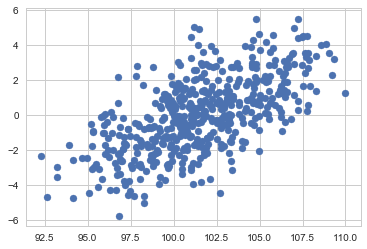

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["y"],result1['residuals'])
plt.show()
plt.close()

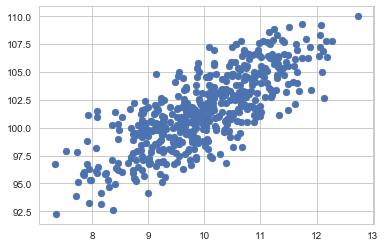

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["x"],data["y"])
plt.show()
plt.close()

It seems like the T^2 is right on the dot. The standard deviation is also very close to what I had originally put, and seems to be within the 95% CI. The B_1 coefficient is also contained within the 95% Bootstrap CI. However, the intercept is way off. I'm not really sure why, but it's nowhere close to the actual value, but it might be because the random errors I added had a mean of 50. Actually that's probably it. On the other hand, the residuals compared to the y values show some pattern. 

## Generate $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$

In [9]:
np.random.seed([1236])
data = {}
data["x1"] = np.random.normal(10.0, 1, 500)
data["x2"] = np.random.binomial(1, .7, 500)
data["e"] = np.random.normal(50, 8, 500)
data["y"] = 26.4 + data["x1"] * 2.5 + 3.1*data["x2"] + 2.8*data["x1"]*data["x2"] + data["e"]
data = pd.DataFrame(data)
result1 = models.linear_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lr(result1))
result2 = models.bootstrap_linear_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lr(result2))

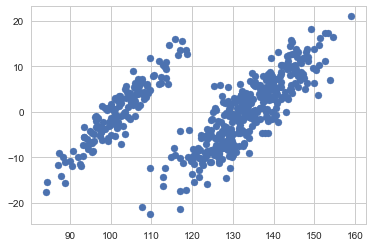

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["y"],result1['residuals'])
plt.show()
plt.close()

Surprisingly (to me at least), the residuals showed a clear delineation of having two groups. Thinking about it, it makes sense, since i did not make the error terms dependent on x2. In this case, the sigma 95% CI did not capture the true standard deviation, but was a little short. 

## Regresion model with two continuous variables

In [5]:
np.random.seed([1237])
data = {}
data["x1"] = np.random.normal(10.0, 1, 500)
data["x2"] = np.random.normal(20.0, 5, 500)
data["e1"] = np.random.normal(50, 8, 500)
data["e2"] = np.random.normal(20, 4, 500)
data["y"] = 26.4 + data["x1"] * 2.5 + 3.1*data["x2"] + 1.8*data["x1"]*data["x2"] + data["e1"]+data['e2']
data = pd.DataFrame(data)
result1 = models.linear_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lr(result1))
result2 = models.bootstrap_linear_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lr(result2))

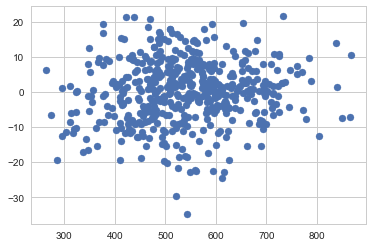

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["y"],result1['residuals'])
plt.show()
plt.close()

In [13]:
np.random.seed([1237])
data = {}
data["x1"] = np.random.normal(10.0, 1, 500)
data["x2"] = np.random.normal(20.0, 5, 500)
data["e1"] = np.random.normal(50, 70, 500)
data["e2"] = np.random.normal(20, 4, 500)
data["y"] = 26.4 + data["x1"] * 2.5 + 3.1*data["x2"] + 1.8*data["x1"]*data["x2"] + data["e1"]+data['e2']
data = pd.DataFrame(data)
result1 = models.linear_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lr(result1))
result2 = models.bootstrap_linear_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lr(result2))

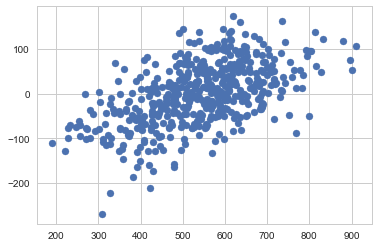

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["y"],result1['residuals'])
plt.show()
plt.close()

In [15]:
np.random.seed([1237])
data = {}
data["x1"] = np.random.normal(10.0, 1, 500)
data["x2"] = np.random.normal(20.0, 5, 500)
data["e1"] = np.random.normal(50, 70, 500)
data["e2"] = np.random.normal(20, 40, 500)
data["y"] = 26.4 + data["x1"] * 2.5 + 3.1*data["x2"] + 1.8*data["x1"]*data["x2"] + data["e1"]+data['e2']
data = pd.DataFrame(data)
result1 = models.linear_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lr(result1))
result2 = models.bootstrap_linear_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lr(result2))

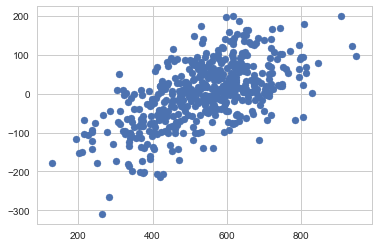

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data["y"],result1['residuals'])
plt.show()
plt.close()

It seems that as I increase the variance, the residuals become more and more patterned. It also seems that with two variables, I would need a larger standard deviation in order to decrease the R^2. WIth the first model that I built, the 95% CI interval for all the coefficients were pretty close to each other. However, performance quickly deteriorated as I increased the standard deviation.

Note: I kept the same seed throughout because I wanted to see what increase the standard deviation did on the same datapoints.

## Logistic Model for $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$

In [17]:
def logistic( z):
    return 1.0 / (1.0 + np.exp( -z))

In [18]:
np.random.seed([1238])
data = {}
data["x1"] = np.random.normal(0, 1, 500)
data["x2"] = np.random.binomial(1, .67, 500)
data["e1"] = np.random.normal(50, 5, 500)
data["z"] = .4 + data["x1"] * .5 + .1*data["x2"] - .3*data["x1"]*data["x2"] + .025*data["e1"]
data['pr'] = list(map(lambda z: logistic(z),data['z']))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))
data = pd.DataFrame(data)
result1 = models.logistic_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lgr(result1))
result2 = models.bootstrap_logistic_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lgr(result2))

In [19]:
np.mean(data['y'])

0.852

I don't think I generated the data correctly, but it seems like the error % is just the mean of the data. The R^2 seems dreadfully low though. The 95% BCI is also very large for all of the coefficients, which means they tend to capture the coefficient, but basically by using a shotgun method. 

## Logistic Model with 2 continuous variables for $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 \times x_2$

In [20]:
np.random.seed([1239])
data = {}
data["x1"] = np.random.normal(0, 1, 500)
data["x2"] = np.random.normal(0, 1, 500)
data["e1"] = np.random.normal(50, 5, 500)
data["z"] = .4 + data["x1"] * .5 + .1*data["x2"] - .3*data["x1"]*data["x2"] + .025*data["e1"]
data['pr'] = list(map(lambda z: logistic(z),data['z']))
data["y"] = list(map(lambda pr: 1 if np.random.uniform() < pr else 0, data["pr"]))
data = pd.DataFrame(data)
result1 = models.logistic_regression( "y ~ x1+ x2 +x1*x2", data = data)
display(models.simple_describe_lgr(result1))
result2 = models.bootstrap_logistic_regression("y~x1+ x2 +x1*x2",data=data)
display(models.describe_bootstrap_lgr(result2))

In [21]:
np.mean(data['y'])

0.814

Well it looks like the same thing is happening here. The Error % is exactly the mean of the data. The spread of the 95% BCI is still very large.